In [1]:
import torchvision
import torch
from torchvision import transforms
import torchvision.transforms.functional as TF
import PIL
from PIL import Image
from IPython.display import display
import numpy as np

/home/zhanghm/miniconda3/envs/py38-torch100-cu11/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'PIL.JpegImagePlugin.JpegImageFile'>


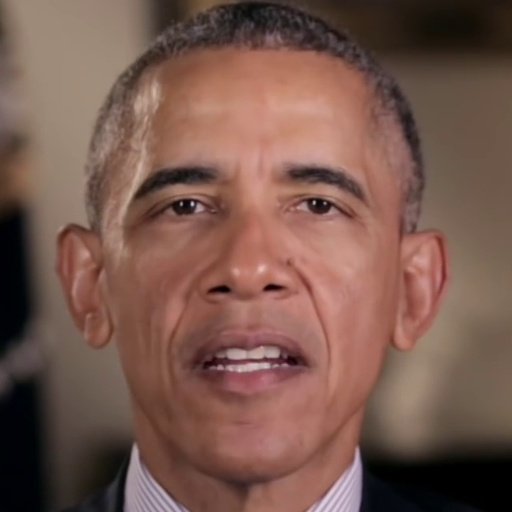

In [18]:
image_path = "./data/obama.jpg"

src_image = Image.open(image_path)
print(type(src_image))

display(src_image)

## ToTensor and ToPILImage

https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#totensor

In [16]:
import cv2

to_PIL_transform = transforms.ToPILImage()
to_tensor_transform = transforms.ToTensor()

img_src = Image.open("./data/obama.jpg").convert("RGB")
img_src = Image.open("./data/obama.jpg").convert("L") # load gray image, ToTensor will also transform it into [0, 1.0]
img_src_arr = np.array(img_src)
# img_src = img_src_arr.astype(np.float32) # if not uint8 dtype, ToTensor will not transform it into [0, 1.0]
print(img_src_arr.shape, img_src_arr.dtype, img_src_arr.min(), img_src_arr.max())

# display(img_src)

# img_src = cv2.imread("./data/obama.jpg")
img_src_tensor = to_tensor_transform(img_src) # to [0, 1.0]
print(img_src_tensor.shape, img_src_tensor.min(), img_src_tensor.max())

img_src_PIL = to_PIL_transform(img_src_tensor) # to [0, 255]
print(type(img_src_PIL))
print(np.array(img_src_PIL).min(), np.array(img_src_PIL).max(), img_src_PIL.mode)

(512, 512) uint8 0 214
torch.Size([1, 512, 512]) tensor(0.) tensor(0.8392)
<class 'PIL.Image.Image'>
0 214 L


## Transform a batch image

<class 'torch.Tensor'> torch.Size([2, 3, 512, 512])
<class 'torch.Tensor'> torch.Size([2, 3, 600, 600])


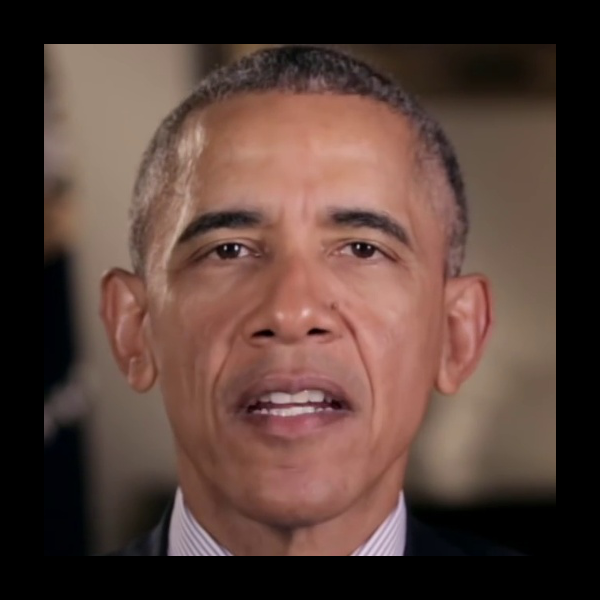

In [25]:
TRAIN_IMAGE_SIZE = 600
import numpy as np

image = torch.from_numpy(np.array(src_image, np.uint8))
image = image.permute(2, 0, 1)[None]
image = image.repeat((2, 1, 1, 1)) 


print(type(image), image.shape)

custom_transform = transforms.CenterCrop((TRAIN_IMAGE_SIZE, TRAIN_IMAGE_SIZE))
image = custom_transform(image)

print(type(image), image.shape)

image = image[1]

image = Image.fromarray(image.permute(1, 2, 0).numpy())
display(image)

## Resize transform

(256, 256) RGB


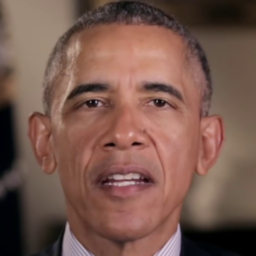

In [13]:
target_image_size = (256, 256)

trans = transforms.Resize(target_image_size)

img_path = "./data/obama.jpg"
img_src = PIL.Image.open(img_path).convert('RGB')

# display(img_src)

img_resize = trans(img_src)
print(img_resize.size, img_resize.mode)
display(img_resize)


## Flip

(512, 512) RGB


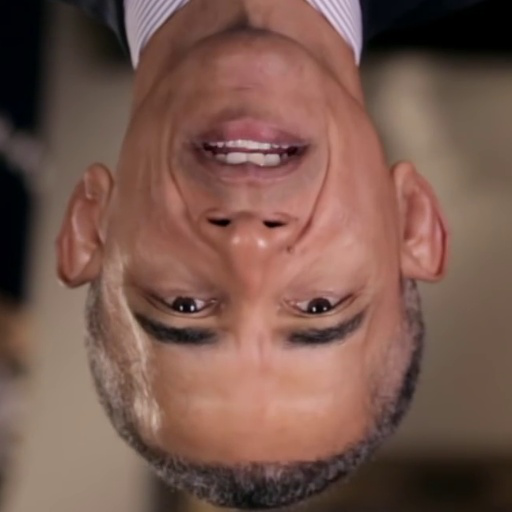

In [11]:
import torchvision.transforms as T

vflipper = T.RandomVerticalFlip(p=1.0)

img_path = "./data/obama.jpg"
img_src = PIL.Image.open(img_path).convert('RGB')

img_resize = vflipper(img_src)
print(img_resize.size, img_resize.mode)
display(img_resize)


## Normalize transform

In [10]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))


input = torch.rand(5, 3, 256, 256)
print(input.shape, input.min(), input.max())

output = normalize(input)
print(output.shape, output.min(), output.max())

torch.Size([5, 3, 256, 256]) tensor(0.) tensor(1.0000)
torch.Size([5, 3, 256, 256]) tensor(-1.) tensor(1.0000)


In [18]:
input = torch.randn(16, 3, 256, 256)
input = torch.randn(6, 3, 256, 256)

vis_images = input[:10, ...]
print(vis_images.shape)


input = torch.randn(6, 4, 3, 256, 256)
output = input.to(torch.float32)
print(output.shape, output.dtype)

torch.Size([6, 3, 256, 256])
torch.Size([6, 4, 3, 256, 256]) torch.float32
